###**Studi Kasus 03 - Kelompok 08**

Nur Izzati Safitri (11210940000044)

Nurul Lu'lu Kamilah (11210940000045)

Syahrul Azka (11210940000049)

Yudistira Pratama (11210940000052)

Delia Amalia (11210940000065)

Dharma Syadhi Putra Adjie (11210940000067)

Khoirunnisa (11210940000068)

In [213]:
import numpy as np
import pandas as pd
import matplotlib as mp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [214]:
#Import Data-Loading Data kota Depok, Tangerang, dan Jakarta

import pandas as pd

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-CaseStudies/main/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/EDA-Case-01-PreProcessing/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfB.shape, dfX.shape

((1024, 26), (999, 26), (992, 26))

# **A. Gabungkan Data Jakarta, bogor dan Bekasi**


In [215]:
datagabung = pd.concat([dfJ, dfB, dfX])
datagabung

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
990,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# **Preprocessing**

#1. Missing Value

In [216]:
datagabung.isnull().sum()

created_at     2594
LT             2594
LB             2594
KT             2594
KM             2595
garasi         2745
carport        2651
lokasi         2594
sertifikat     2597
listrik        2601
hadap          2912
harga          2594
URL            2594
deskripsi      2603
Unnamed: 14    3015
Unnamed: 15    3015
Unnamed: 16    3015
Unnamed: 17    3015
Unnamed: 18    3015
Unnamed: 19    3015
Unnamed: 20    3015
Unnamed: 21    3015
Unnamed: 22    3015
Unnamed: 23    3015
Unnamed: 24    3015
Unnamed: 25    3015
dtype: int64

Karena pada Unnamed 14-25 terdapat lebih Missing Value maka kita hilangkan kolom Unnamed 14-25 tersebut menggunakan drop

In [217]:
#Menghapus kolom yang berisi NaN
databersih = datagabung.dropna(axis=1, how='all')
databersih1 = databersih.dropna(axis=0, how='all')
databersih1

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,4.500000e+09,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Mengusung konsep minimalis, dan didukung denga..."
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,NaN,3.950000e+08,https://www.rumah.com/listing-properti/dijual-...,"Dekat dengan Mall Atrium Senen, dekat dengan a..."
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,8.350000e+08,https://www.rumah.com/listing-properti/dijual-...,"Berlokasi sangat strategis, sangat dekat ke Tu..."
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,NaN,1.100000e+09,https://www.rumah.com/listing-properti/dijual-...,"Bisa request ubah tata ruang, beli 2 unit mend..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,01-12-2021,180.0,220.0,5.0,3.0,NaN,NaN,Kota Bekasi,SHM,2200.0,NaN,1.600000e+09,https://www.rumah123.com/properti/bekasi/hos92...,Akses pintu tol Bekasibarat; Dekat Mall Summar...
103,01-12-2021,140.0,250.0,3.0,2.0,NaN,NaN,Kabupaten Bekasi,SHM,2200.0,Selatan,8.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"DIJUAL RUMAH, Taman Kebalen bekasi cluster, Ju..."
104,01-12-2021,60.0,55.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,NaN,2.500000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Di jual Rumah Lelang Bank Pondok Ungu Permai, ..."
105,01-12-2021,36.0,60.0,2.0,1.0,NaN,NaN,Kabupaten Bekasi,SHM,1300.0,Timur,3.000000e+08,https://www.rumah123.com/properti/bekasi/hos92...,"Lokasi Super Strategis, Selangkah menuju Kota ..."


Karena dari baris ke-122

- LT (Luas Tanah) : Besarnya luas tanah rumah.
- LB (Luas Bangunan) : Besarnya luas bangunan rumah.
- KT (Kamar Tidur) : Jumlah kamar tidur yang tersedia.
- KM (Kamar Mandi) : Jumlah kamar mandi yang tersedia.
- Garasi : Banyaknya mobil yang dapat diparkir didalam garasi.
- Carpot : Banyaknya mobil yang dapat diparkir di luar rumah.
- Lokasi : Letak rumah.
- Sertifikat : Memberi tahu kepemilikan rumah.
- Listrik : Besarnya daya listrik rumah.
- Hadap : Menjelaskan arah posisi rumah.
- Harga : Harga rumah.
- URL : Sumber info mengenai data.
- Deskripsi : Penjelasan lain mengenai rumah

#3. Outlier

In [218]:
Q1 = databersih1.harga.quantile(0.25)
Q3 = databersih1.harga.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 500000000.0
Q2 = 2300000000.0
IQR = 1800000000.0


In [219]:
batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = -2200000000.0
batas atas = 5000000000.0


Text(0.5, 1.0, 'Harga Boxplot')

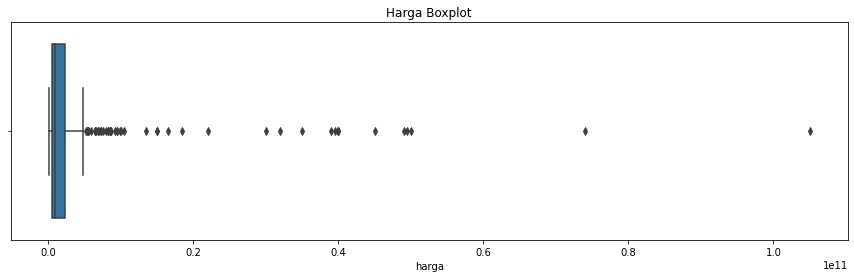

In [220]:
import matplotlib.pyplot as plt 
import seaborn as sns
fig, ax = plt.subplots(figsize = (15,4))
sns.boxplot(x = databersih1.harga).set_title('Harga Boxplot')

In [221]:
# Deteksi Outlier menggunakan nilai IQR
Q1 = databersih1.harga.quantile(0.25)
Q3 = databersih1.harga.quantile(0.75)
IQR = Q3 - Q1
print('Q1 =', Q1)
print('Q2 =', Q3)
print('IQR =', IQR)

Q1 = 500000000.0
Q2 = 2300000000.0
IQR = 1800000000.0


In [222]:
# Menentukan batas bawah dan batas atas

batasBawah = Q1 - (1.5 * IQR)
batasAtas = Q3 + (1.5 * IQR)
print('batas bawah =', batasBawah)
print('batas atas =', batasAtas)

batas bawah = -2200000000.0
batas atas = 5000000000.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


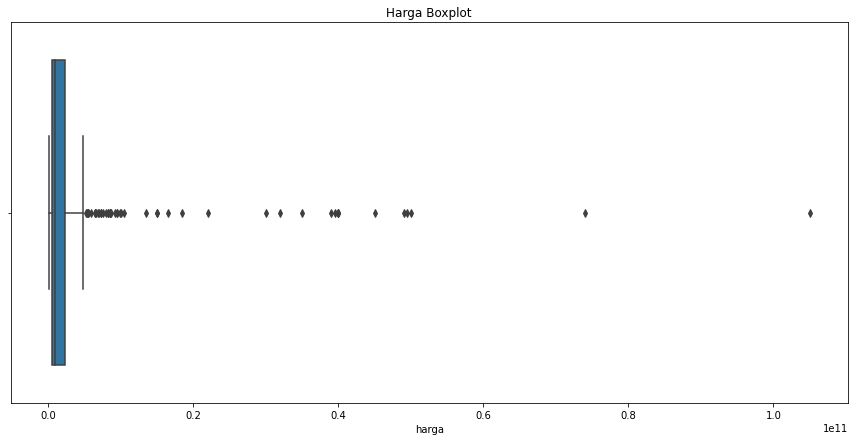

In [223]:
# handle outlier dengan replace menggantinya dengan nilai mean

databersih1['harga'] = databersih1.harga.mask(databersih1.harga > batasAtas, databersih1.harga.mean())
databersih1['harga'] = databersih1.harga.mask(databersih1.harga < batasBawah, databersih1.harga.mean())
fig, ax = plt.subplots(figsize = (15,7))
fig = sns.boxplot(x = databersih.harga).set_title('Harga Boxplot')

#4. Statistika Deskriptif

In [224]:
0# Statistika Sederhana dari data "Numerik"-nya
databersih1.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
count,421,421.000000,421.000000,421.000000,420.000000,270.000000,364.000000,421,418,414.000000,103,4.210000e+02,421,412
unique,20,NaN,NaN,NaN,NaN,NaN,NaN,34,10,NaN,13,NaN,410,389
top,06-12-2021,NaN,NaN,NaN,NaN,NaN,NaN,Kota Bekasi,SHM,NaN,Selatan,NaN,https://www.rumah123.com/perumahan-baru/proper...,Destinasi menarik di kawasan Babakan Madang; G...
freq,123,NaN,NaN,NaN,NaN,NaN,NaN,73,340,NaN,33,NaN,6,6
mean,NaN,164.636580,153.679335,3.216152,2.290476,0.548148,1.420330,NaN,NaN,3042.028986,NaN,1.501460e+09,NaN,NaN
std,NaN,243.750982,195.487667,1.525443,1.461161,0.988548,1.042736,NaN,NaN,4650.863310,NaN,1.238670e+09,NaN,NaN
min,NaN,16.000000,21.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,900.000000,NaN,6.500000e+07,NaN,NaN
25%,NaN,70.000000,45.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,NaN,5.000000e+08,NaN,NaN
50%,NaN,91.000000,80.000000,3.000000,2.000000,0.000000,1.000000,NaN,NaN,2200.000000,NaN,9.500000e+08,NaN,NaN
75%,NaN,156.000000,180.000000,4.000000,3.000000,1.000000,2.000000,NaN,NaN,2200.000000,NaN,2.300000e+09,NaN,NaN


#5. Visualisasi

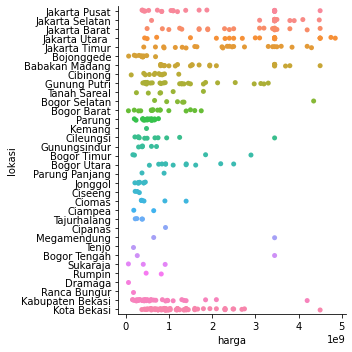

In [225]:
p = sns.catplot(x="harga", y="lokasi", data=databersih1)

Interpretasi: 
Harga rumah yang berlokasi di Ibukota cenderung tinggi, namun masih terdapat harga rumah yang terjangkau dengan fasilitas yang lengkap dan dapat bersaing dengan kota-kota lainnya.

Saran:
Apabila membutuhkan rumah dengan harga terjangkau disarankan untuk mencari di daerah Ibukota terlebih dahulu sebelum mencari di kota lainnya. Karena rumah di Ibukota memiliki kelebihan tersendiri yaitu lokasi yang strategis dan terdapat di pusat kota.

  

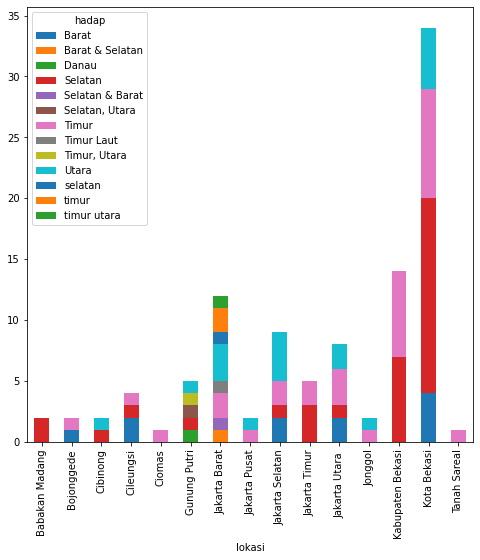

In [226]:
CT = pd.crosstab(index=databersih1["lokasi"], columns=databersih1["hadap"])
p = CT.plot(kind="bar", figsize=(8,8), stacked=True)

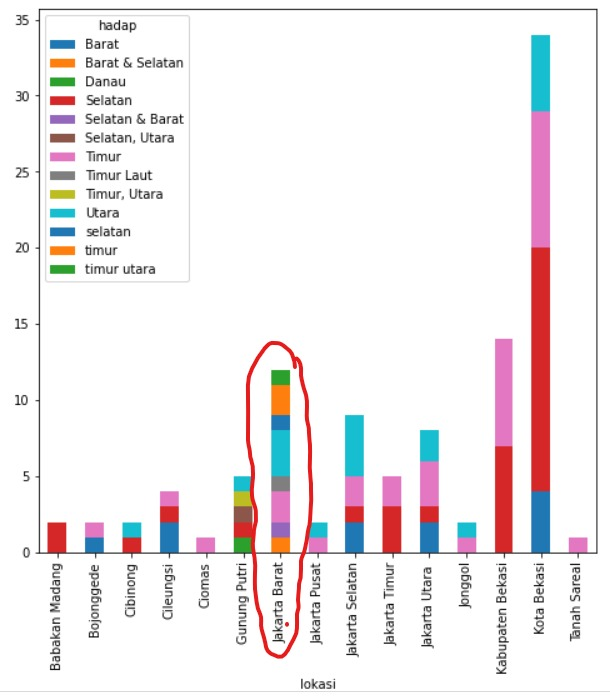Intertpretasi :

Dapat disimpulkan bahwa di daerah jakarta barat memiliki banyak pilihan rumah dengan hadap yang bervariasi. 

Saran:

Disarankan jika ingin membeli rumah dengan hadap yang sesuai dengan keinginan pribadi, lokasi Jakarta Barat menjadi pilihan yang tepat.:



**Kesimpulan**:


Rumah yang berlokasi di Jakarta cenderung memiliki harga yang tinggi dibandingkan dengan kota-kota lainnya, namun juga terdapat banyak rumah yang memiliki harga terjangkau dengan fasilitas yang mumpuni terutama di daerah Jakarta Barat yang memiliki banyak rumah dengan hadap yang bervariasi.